https://stepik.org/lesson/1370093/step/7

<ipython-input-4-7b2a34f894c3>:7: RuntimeWarning: overflow encountered in scalar power
  df = lambda x: 2 + 0.3 * x**2 - 6 * np.sin(3 * x)
<ipython-input-4-7b2a34f894c3>:7: RuntimeWarning: invalid value encountered in sin
  df = lambda x: 2 + 0.3 * x**2 - 6 * np.sin(3 * x)


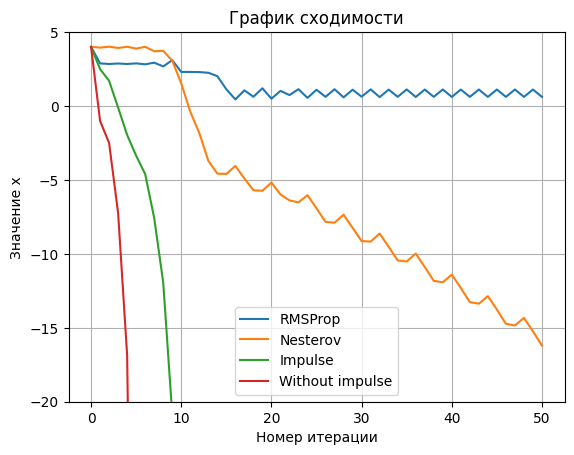

In [ ]:
# @title RMSProp
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию и её производную
f = lambda x: 2 * x + 0.1 * x ** 3 + 2 * np.cos(3 * x) # нужна только для написания df(x)
df = lambda x: 2 + 0.3 * x**2 - 6 * np.sin(3 * x)

η = 0.5
N = 50  # число итераций градиентного алгоритма
α = 0.8
G = 0   # начальное значение для G
ϵ = 0.01
γ = 0.7 # для других методов
v_nesterov = 0   # начальное значение для Nesterov
v_impulse = 0    # начальное значение для импульса

# Запускаем четыре метода в одном цикле
x = 4.0             # RMSProp
x_RMSProp = [x]
x_nesterov = 4.0
x_Nesterov = [x_nesterov]
x_imp = 4.0
x_impulse = [x_imp]
x_wi = 4.0
x_without_impulse = [x_wi]

for _ in range(N):
    # RMSProp
    G = α * G + (1 - α) * df(x) * df(x)
    x -= η * df(x) / (G**.5 + ϵ)
    x_RMSProp.append(x)

    # Nesterov
    v_nesterov = γ * v_nesterov + (1 - γ) * η * df(x - γ * v_nesterov)
    x_nesterov -= v_nesterov
    x_Nesterov.append(x_nesterov)

    # Impulse
    v_impulse = γ * v_impulse + (1 - γ) * η * df(x_imp)
    x_imp -= v_impulse
    x_impulse.append(x_imp)

    # Without impulse
    x_wi -= η * df(x_wi)
    x_without_impulse.append(x_wi)

# График сходимости
plt.plot(x_RMSProp, label='RMSProp')
plt.plot(x_Nesterov, label='Nesterov')
plt.plot(x_impulse, label='Impulse')
plt.plot(x_without_impulse, label='Without impulse')
plt.grid()
plt.title('График сходимости')
plt.xlabel('Номер итерации')
plt.ylabel('Значение x')
plt.legend()
plt.ylim([-20, 5])  # Пределы по оси Y
plt.show()
